In [2]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats


In [3]:
df_react = pd.read_csv("../Datasets/react/react_adaptable_issues.csv")

df_react.head()

,version,date,timestamp,security_issues_low,reliability_issues_low,maintainability_issues_low,total_debt_low,security_issues_medium,reliability_issues_medium,maintainability_issues_medium,total_debt_medium,security_issues_high,reliability_issues_high,maintainability_issues_high,total_debt_high
0,v16.6.3,2018-11-12,1542074346,0,0,0,0,0,0,82,1225,0,0,18,701
1,v16.7.0,2018-12-14,1544814203,0,0,0,0,0,0,82,1225,0,0,18,701
2,v16.7.0-alpha.1,2018-11-13,1542137020,0,0,0,0,0,0,82,1220,0,0,18,701
3,v16.8.0,2019-02-05,1549388061,0,0,0,0,0,0,82,1220,0,0,18,701
4,v16.8.0-alpha.1,2019-01-15,1547592942,0,0,0,0,0,0,82,1220,0,0,18,510


In [4]:
column_names = df_react.columns[3:]
column_names

Index(['security_issues_low', 'reliability_issues_low',
       'maintainability_issues_low', 'total_debt_low',
       'security_issues_medium', 'reliability_issues_medium',
       'maintainability_issues_medium', 'total_debt_medium',
       'security_issues_high', 'reliability_issues_high',
       'maintainability_issues_high', 'total_debt_high'],
      dtype='object')

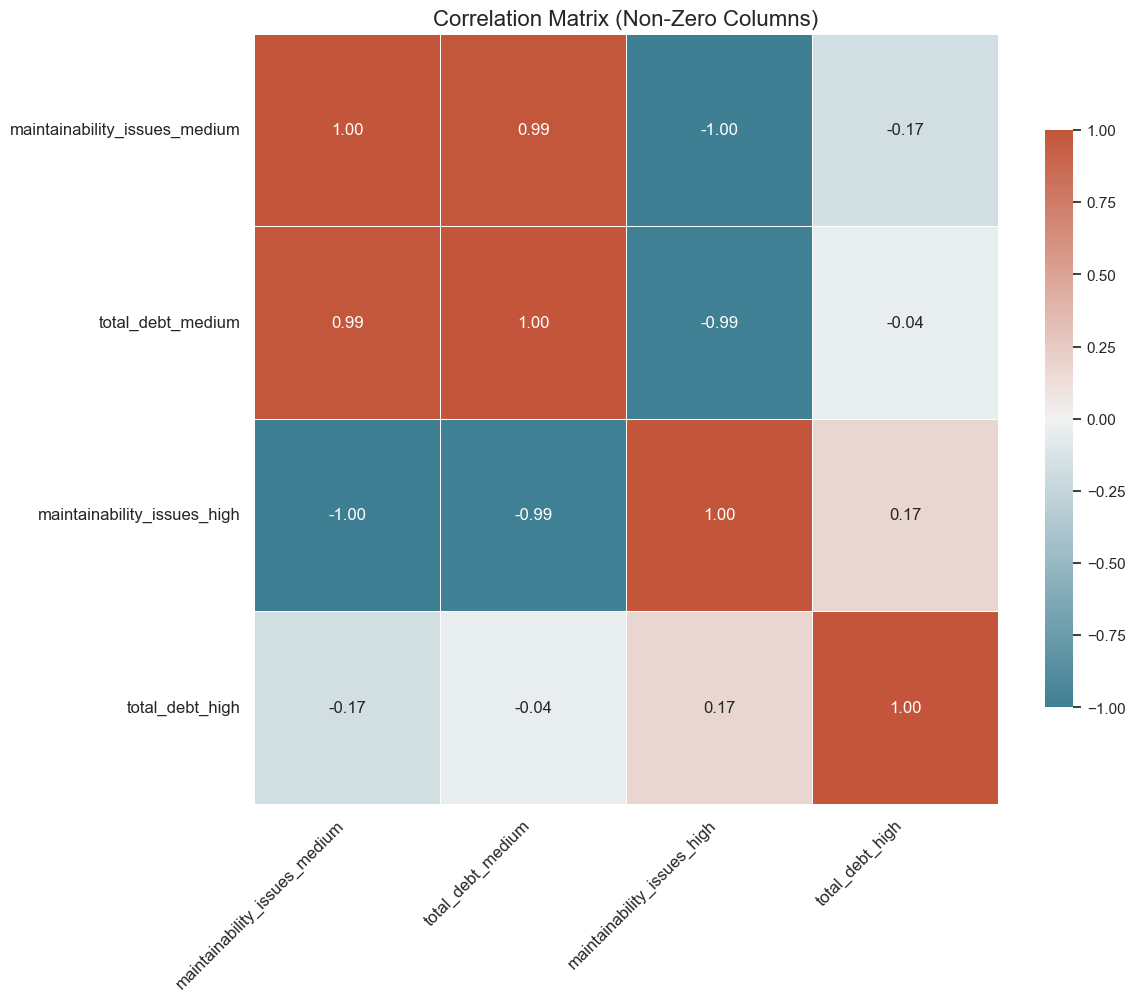

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df_react'
# If not, you can read your data into a DataFrame using pd.read_csv() or another appropriate method

# Select the columns you want to include in the correlation matrix
selected_columns = ['security_issues_low', 'reliability_issues_low', 'maintainability_issues_low', 'total_debt_low',
                    'security_issues_medium', 'reliability_issues_medium', 'maintainability_issues_medium', 'total_debt_medium',
                    'security_issues_high', 'reliability_issues_high', 'maintainability_issues_high', 'total_debt_high']

# Create a subset DataFrame with selected columns
correlation_df = df_react[selected_columns]

# Filter out columns where the entire column is zero
non_zero_columns = correlation_df.columns[(correlation_df != 0).any()]

# Create a subset DataFrame with non-zero columns
correlation_nonzero_df = correlation_df[non_zero_columns]

# Calculate the correlation matrix for non-zero columns
correlation_matrix_nonzero = correlation_nonzero_df.corr()

# Create a colorful and sleek heatmap for non-zero columns
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")  # Set Seaborn theme
cmap = sns.diverging_palette(220, 20, as_cmap=True)  # Choose a diverging color palette

# Create the heatmap for non-zero columns
sns.heatmap(correlation_matrix_nonzero, annot=True, cmap=cmap, fmt='.2f', linewidths=.5, cbar_kws={"shrink": .75})

# Add a title
plt.title('Correlation Matrix (Non-Zero Columns)', fontsize=16)

# Adjust plot aesthetics
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, ha='right', fontsize=12)
plt.show()


In [16]:
import pandas as pd
import plotly.graph_objects as go

# Assuming your data is in a DataFrame named 'df_react'
# If not, you can read your data into a DataFrame using pd.read_csv() or another appropriate method

# Convert the 'timestamp' column to datetime format
df_react['timestamp'] = pd.to_datetime(df_react['timestamp'])

# Choose the columns you want to analyze
columns_to_plot = ['security_issues_low', 'reliability_issues_low', 'maintainability_issues_low', 'total_debt_low',
                   'security_issues_medium', 'reliability_issues_medium', 'maintainability_issues_medium', 'total_debt_medium',
                   'security_issues_high', 'reliability_issues_high', 'maintainability_issues_high', 'total_debt_high']

# Filter out columns where the entire column is zero
non_zero_columns = [column for column in columns_to_plot if any(df_react[column] != 0)]

# Plot control charts for each non-zero column
for column in non_zero_columns:
    fig = go.Figure()

    # Scatter plot with lines for data points
    fig.add_trace(go.Scatter(x=df_react['timestamp'], y=df_react[column], mode='lines+markers', name='Data Points'))

    # Line for the mean
    fig.add_trace(go.Scatter(x=df_react['timestamp'], y=[df_react[column].mean()] * len(df_react),
                             mode='lines', line=dict(dash='dash'), name='Mean'))

    # Line for upper control limit
    upper_limit = df_react[column].mean() + 3 * df_react[column].std()
    fig.add_trace(go.Scatter(x=df_react['timestamp'], y=[upper_limit] * len(df_react),
                             mode='lines', line=dict(dash='dash'), name='Upper Control Limit'))

    # Line for lower control limit
    lower_limit = df_react[column].mean() - 3 * df_react[column].std()
    fig.add_trace(go.Scatter(x=df_react['timestamp'], y=[lower_limit] * len(df_react),
                             mode='lines', line=dict(dash='dash'), name='Lower Control Limit'))

    # Set layout
    fig.update_layout(title=f'Control Chart - {column}',
                      xaxis_title='Timestamp',
                      yaxis_title=column)

    fig.show()


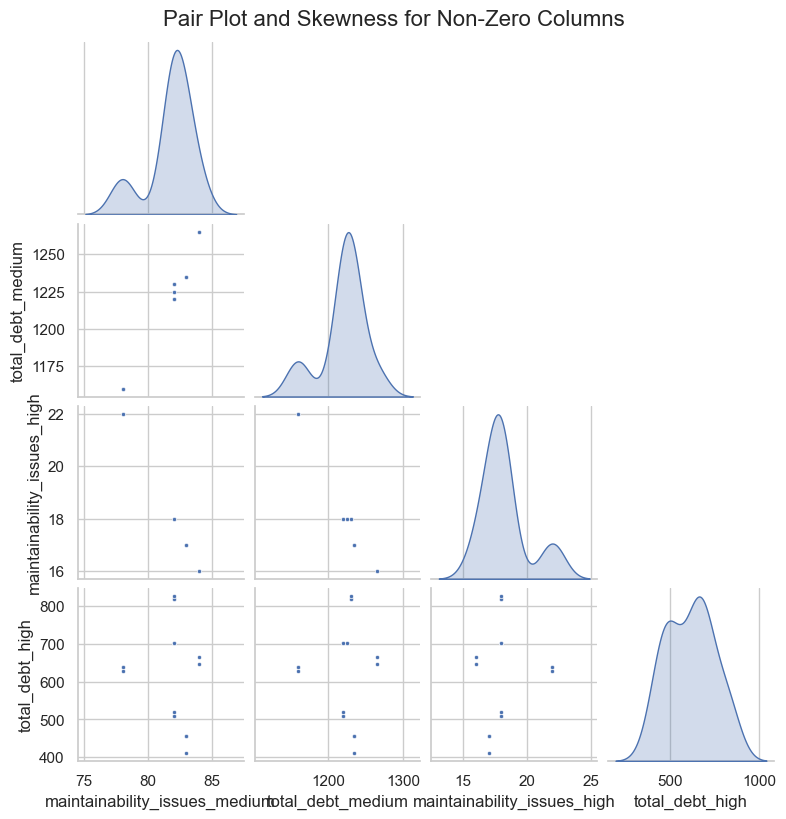

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df_react'
# If not, you can read your data into a DataFrame using pd.read_csv() or another appropriate method

# Select the columns you want to include in the pair plot
selected_columns = ['security_issues_low', 'reliability_issues_low', 'maintainability_issues_low', 'total_debt_low',
                    'security_issues_medium', 'reliability_issues_medium', 'maintainability_issues_medium', 'total_debt_medium',
                    'security_issues_high', 'reliability_issues_high', 'maintainability_issues_high', 'total_debt_high']

# Create a subset DataFrame with selected columns
pairplot_df = df_react[selected_columns]

# Filter out columns where the entire column is zero
non_zero_columns = pairplot_df.columns[(pairplot_df != 0).any()]

# Create a pair plot with scatter plots and histograms for non-zero columns
sns.set(style="whitegrid")
sns.pairplot(pairplot_df[non_zero_columns], corner=True, diag_kind='kde', markers='.', height=2)
plt.suptitle("Pair Plot and Skewness for Non-Zero Columns", y=1.02, fontsize=16)
plt.show()
